In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Загрузка и подготовка датасета

In [142]:
# исходный Excel со значениями производственных показателей по площадкам (СК)
df = pd.read_excel(r'c:\Users\petrenkovn\Dropbox\DS-22\Data_Files\Экономика_площадки\CSV Конструктор 2020 ряд показателей.xlsx')
# дополнительные мэппинги для присоединения Left join
map1 = pd.read_excel(r'c:\Users\petrenkovn\Dropbox\DS-22\Data_Files\Экономика_площадки\Порядок сортировки.xlsx')
# объединение таблиц, удаление лишних столбцов
df = df.merge(map1)
df.drop(labels={'Показатель','Номер показателя'}, axis=1, inplace=True)
# преобразование формата таблицы таким образом, чтобы каждый показатель был записан в отдельном столбце. Площадка - как индекс.
df = df.pivot_table(index='СК', columns='Номер и наименование показателя', values='Факт')

df.head()

Номер и наименование показателя,003 Число отнятых поросят на свиноматку в год,004 % осеменения (оплодотворяемости),005 Количество опоросов на свиноматку в год,008 Количество живорожденных на опорос,009 % падежа поросят,022 Годовой % замены стада,024 % выбраковки свиноматок в год,"026 Себестоимость привеса на доращивание, руб/кг","029 Вес при входе на доращивание, кг/гол",030 Возраст при входе в доращивание (дней),...,"105 Товарная свинья, кг/гол","111 Категоризация: Товарная свинья, кг/гол","116 Товарная свинья, тыс. руб.","122 Категоризация: Товарная свинья, руб/кг","125 Сумма дисконта за качество товарного живка (вет. дефекты, категорийность) , тыс.руб.","127 Цена реализации живка эффективная без НДС, руб/кг.","128 Дисконт за качество, руб/кг","130 Коммерческая прибыль, тыс.руб.","131 Коммерческая прибыль, руб/гол","132 Коммерческая прибыль, руб/кг"
СК,,,,,,,,,,,,,,,,,,,,,
АЛЕКСАНДРОВСКИЙ,26.384842,0.901802,2.230210,12.770300,0.100858,0.677727,0.471794,54.038235,6.610013,21.913683,...,114.521997,115.736908,1.208409e+06,84.170131,50344.070954,82.304363,5.214849,261444.347317,1974.983361,17.142469
БЕЛЯЕВСКИЙ,26.732071,0.883024,2.214782,14.145137,0.135095,0.820457,0.660648,35.956480,5.978103,22.362850,...,120.936674,117.953555,1.270321e+06,85.873705,60717.417253,85.324356,4.014747,340949.976060,2546.036830,20.953489
БУЛАНОВСКИЙ,28.473325,0.921152,2.210696,15.429417,0.107071,0.519686,0.281016,53.182699,6.014649,23.446522,...,122.379784,119.299642,1.113986e+06,86.409797,53655.273909,84.596713,4.697420,277402.626023,2478.690310,20.307118
БУРНАКСКИЙ,28.726000,0.883170,2.223320,14.529868,0.120975,0.671885,0.489839,37.272108,5.832169,23.425315,...,119.759086,117.482177,1.302758e+06,86.298003,65052.916906,85.426003,4.157068,375740.813863,2653.424388,22.481898
ВЕРХОПЕНЬЕ,25.334625,0.860888,2.234597,12.444075,0.082200,0.949099,0.610435,42.730782,6.074760,20.255164,...,115.420399,118.056801,5.656051e+05,82.673841,39636.629677,82.236929,5.437765,46300.353545,711.842220,6.125593


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, АЛЕКСАНДРОВСКИЙ to ЮТАНОВСКИЙ
Data columns (total 39 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   003 Число отнятых поросят на свиноматку в год                                             23 non-null     float64
 1   004 % осеменения (оплодотворяемости)                                                      23 non-null     float64
 2   005 Количество опоросов на свиноматку в год                                               23 non-null     float64
 3   008 Количество живорожденных на опорос                                                    23 non-null     float64
 4   009 % падежа поросят                                                                      23 non-null     float64
 5   022 Годовой % замены стада                

## Поверхностное изучение производственных показателей через анализ распределений значений
Изучаем с помощью гистограмм свойства распределений:
- размах (узкий или широкий);
- центр (один или несколько);
- форму (прямая или плоская, сколько пиков, похожа ли на нормальное распределение). 

Для дальнейшего исследования **отбираем небольшой набор показателей**, где распределение значений вызывает интерес. Те показатели, у которых есть размах, форма отличная от плоской и т.п.

Примечание: отбор показателей осуществляется итеративно непосредственно при подготовке датасета, т.е. вне этого ноутбука.

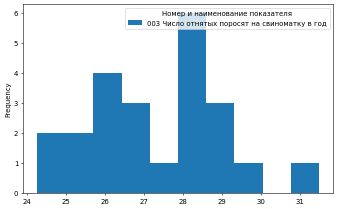

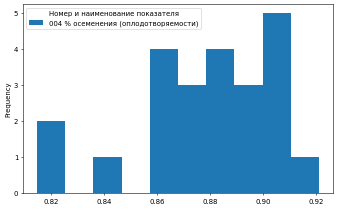

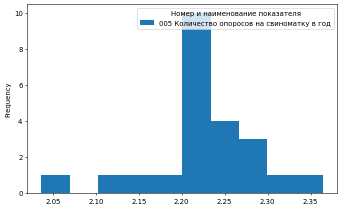

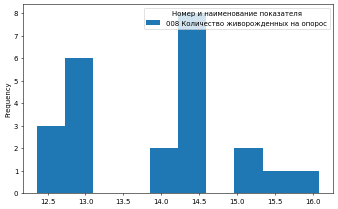

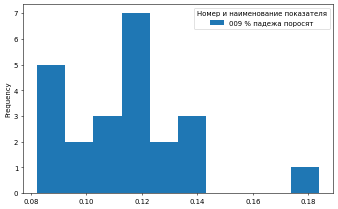

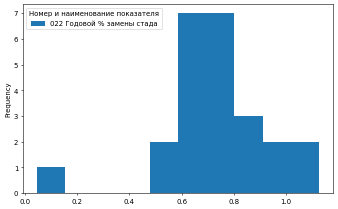

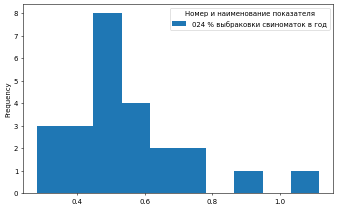

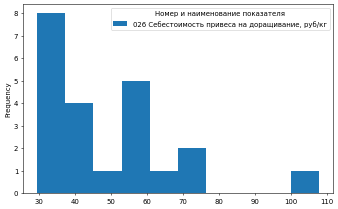

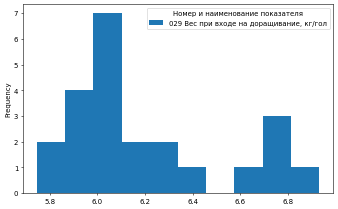

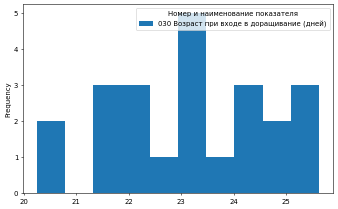

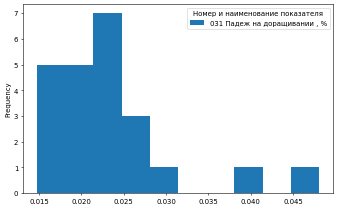

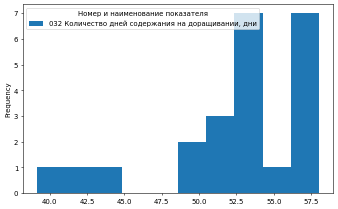

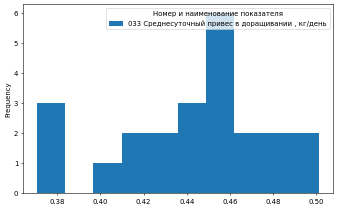

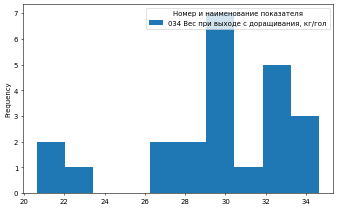

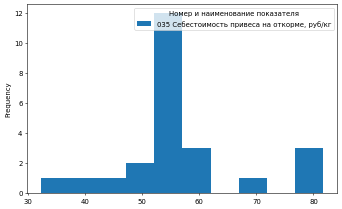

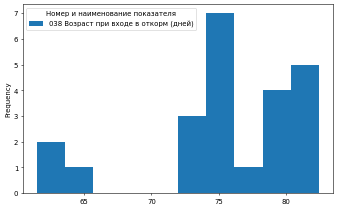

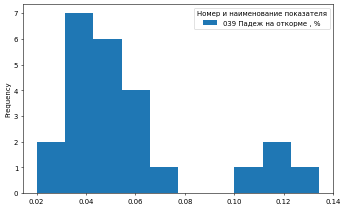

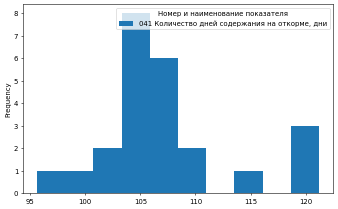

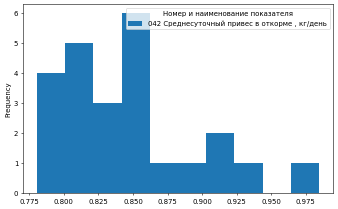

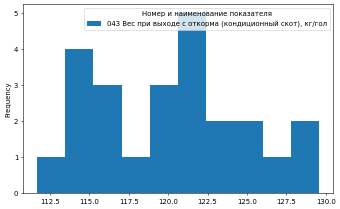

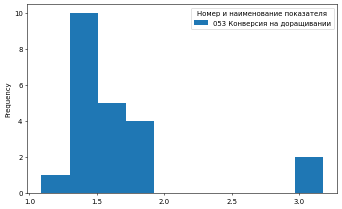

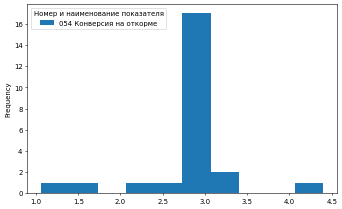

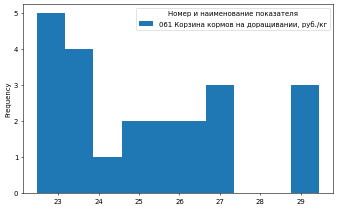

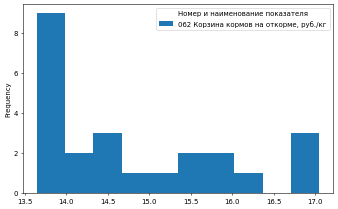

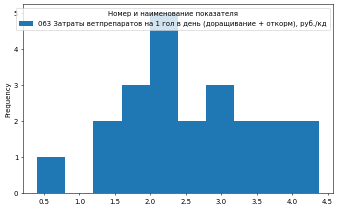

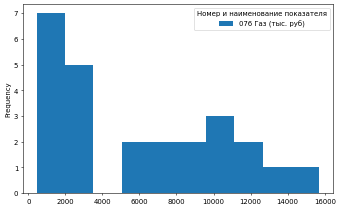

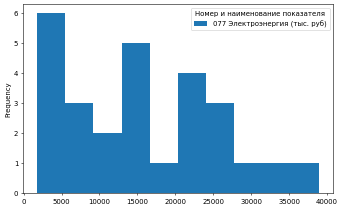

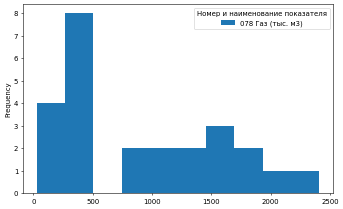

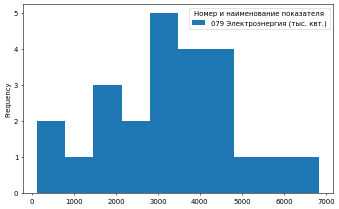

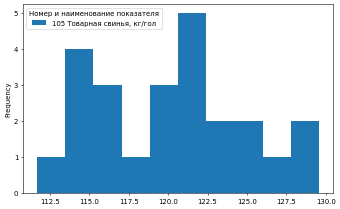

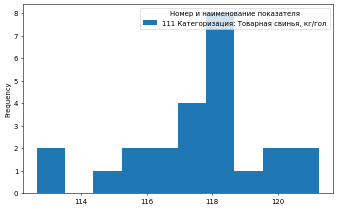

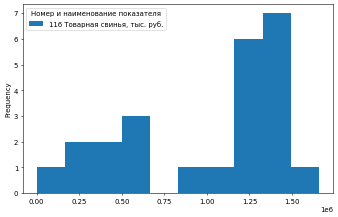

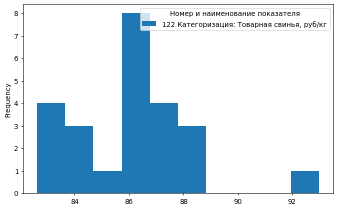

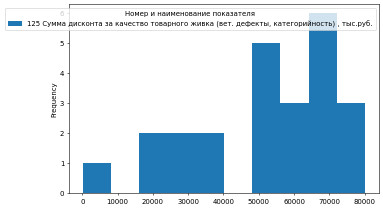

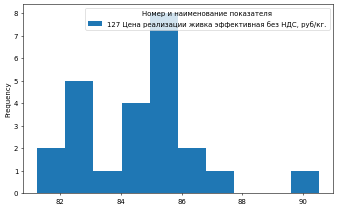

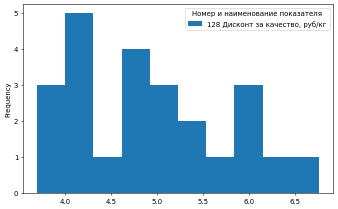

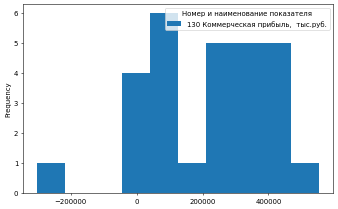

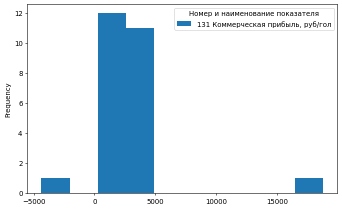

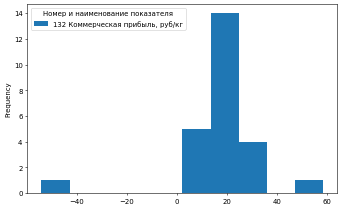

In [203]:
#увеличим дефолтный размер графиков (inches)
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 50

for column in df.columns:
    df[[column]].plot(kind='hist')

# df[['001 Продуктивные свиноматки']].plot(kind='hist')

## Поиск возможных корреляций с помощью матрицы попарных корреляций показателей
Строим матрицу скаттерплотов по нескольким десяткам показателей. Ищем те, где визуально прослеживается прямая или обратная коррелиция, которую будем изучать отдельно.

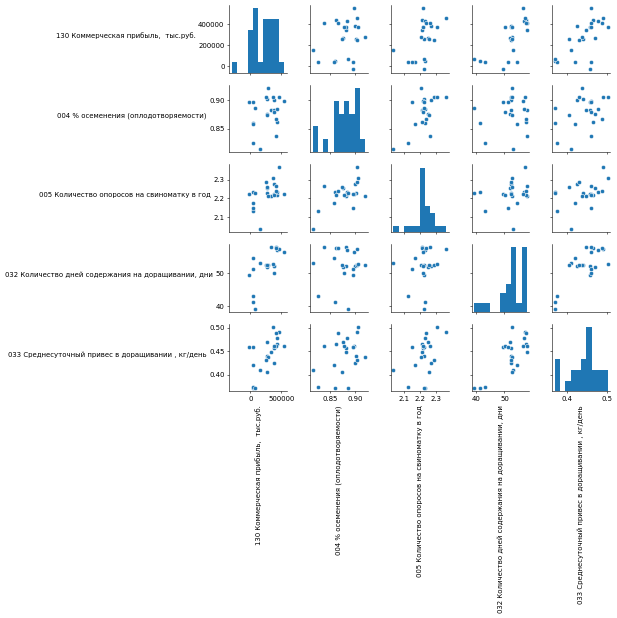

In [226]:
# целевое разрешение 50
plt.rcParams['figure.dpi'] = 50

# g = sns.pairplot(df)
g = sns.pairplot(df[[
    '130 Коммерческая прибыль,  тыс.руб.',
    '004 % осеменения (оплодотворяемости)',
    '005 Количество опоросов на свиноматку в год',
'032 Количество дней содержания на доращивании, дни',
'033 Среднесуточный привес в доращивании , кг/день',
    ]])

# манипуляции с подписями
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

# включение режима tight layout
g.fig.tight_layout()
g


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


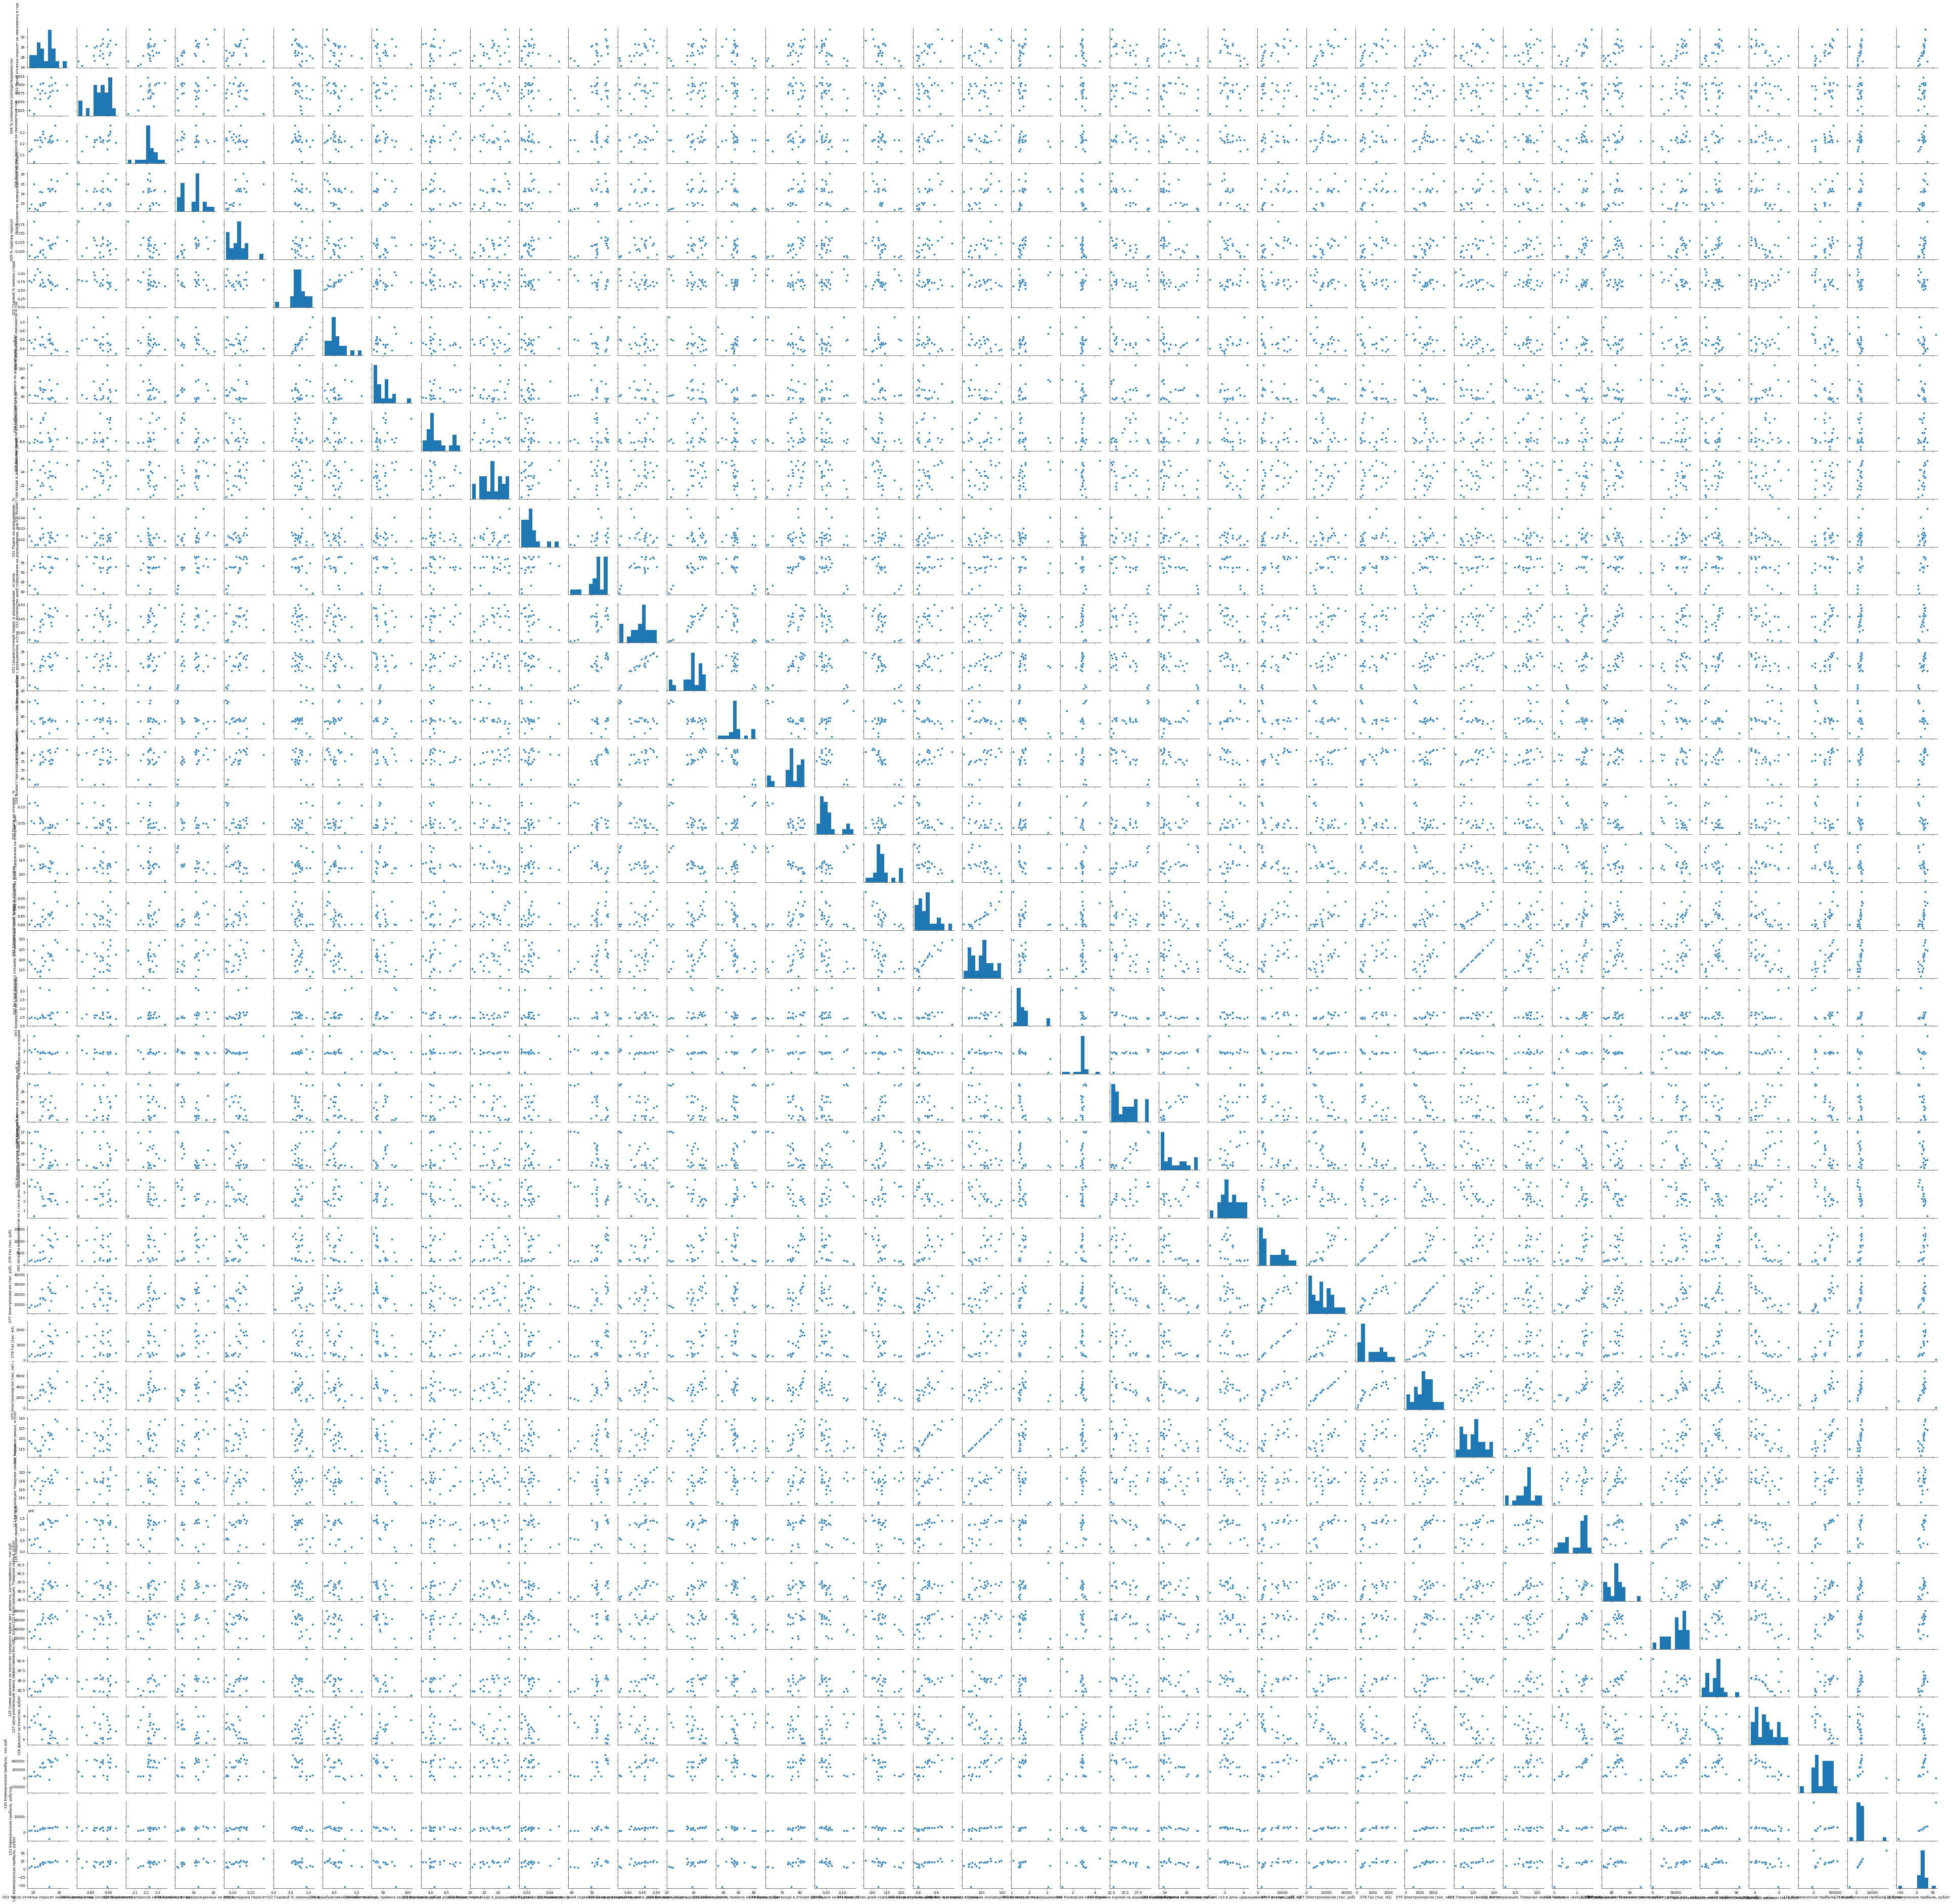

In [124]:
sns.pairplot(df)

## Изучение отдельных корреляций между парами показателей

С помощью точечных графиков, построенных в итеративном режиме, найдем четкие **корреляции для главного финансового показателя площадок - "Коммерческая прибыль"**.

In [207]:
# усечение основного датасета - удаление неиспользуемых числовых столбцов
df_reduced = df.copy()

df_reduced.drop(labels={
    '130 Коммерческая прибыль,  тыс.руб.',
    '004 % осеменения (оплодотворяемости)',
    '005 Количество опоросов на свиноматку в год',
    '008 Количество живорожденных на опорос',
    '009 % падежа поросят',
}, axis=1, inplace=True)
#     '',
#     '',
#     '',
#     '',
#     '',
#     '',
#     '',

# df_reduced.head()

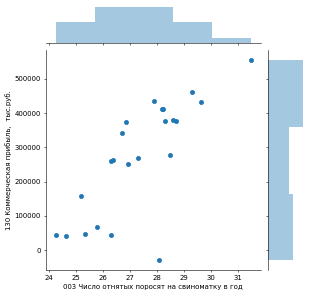

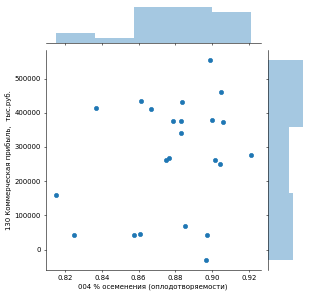

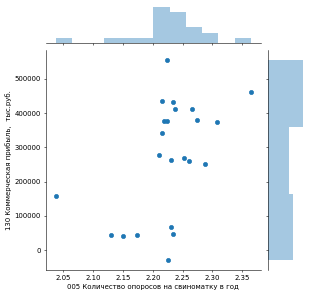

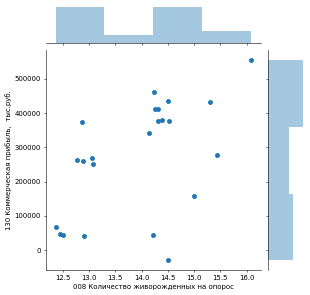

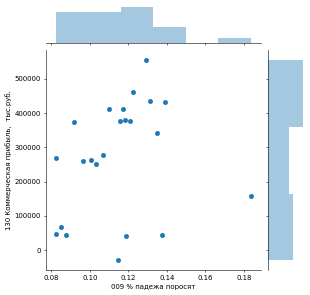

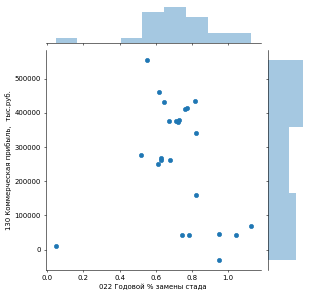

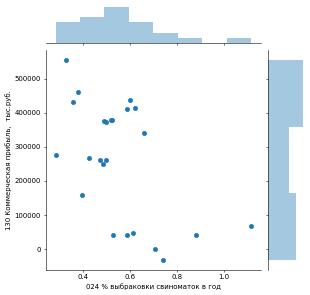

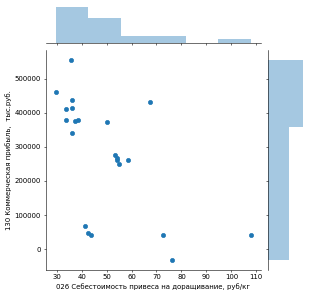

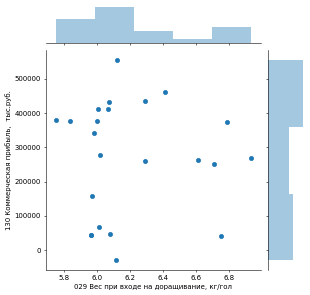

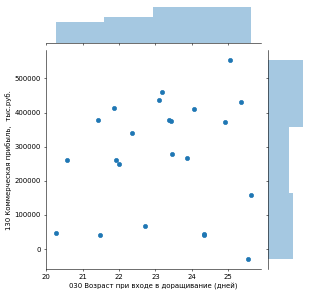

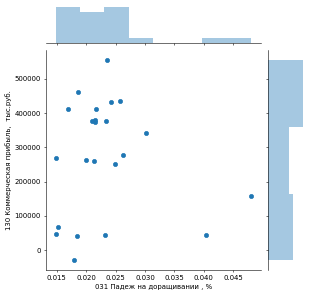

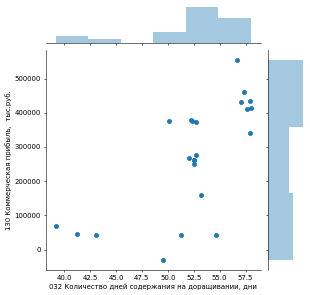

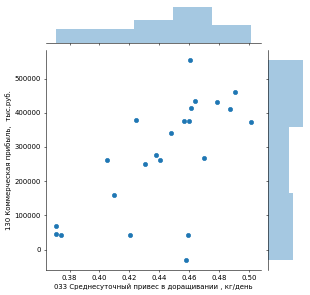

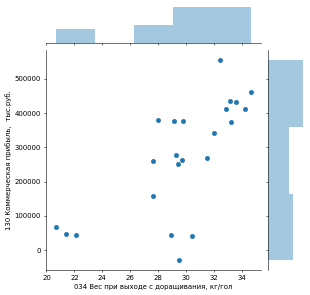

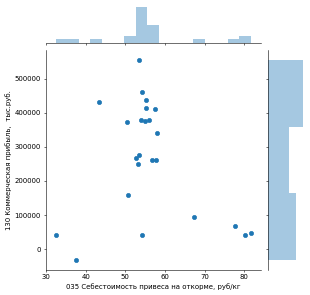

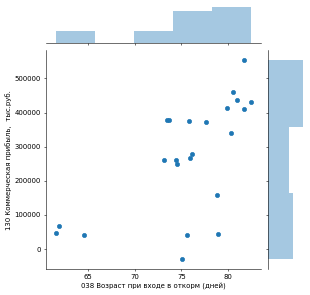

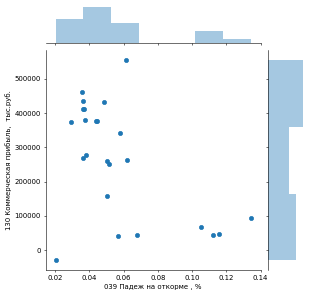

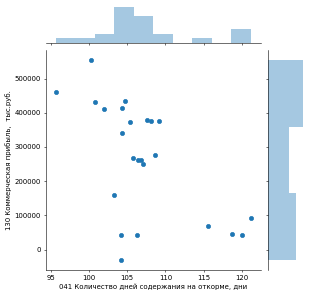

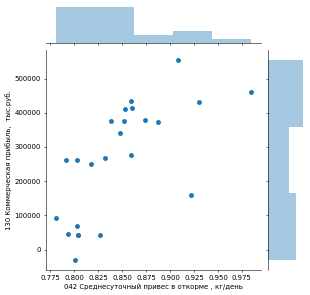

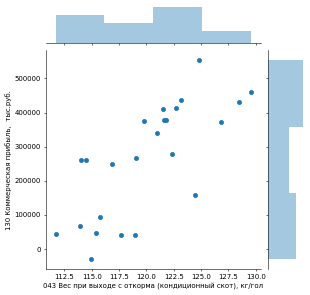

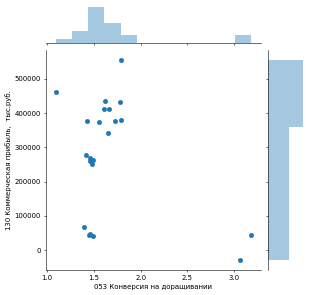

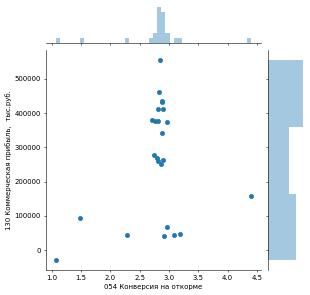

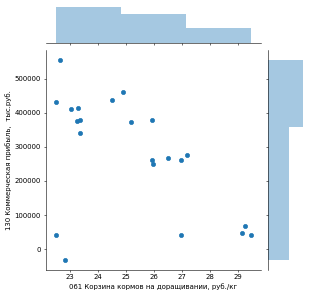

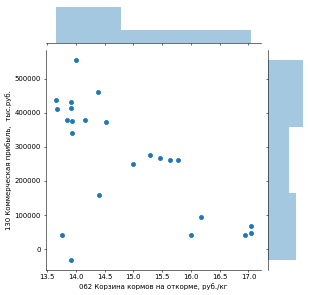

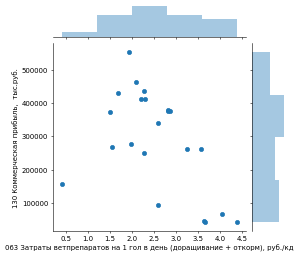

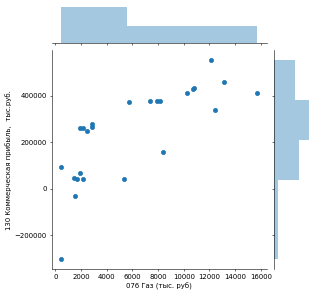

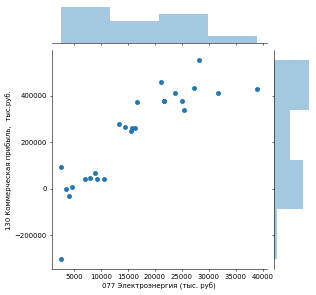

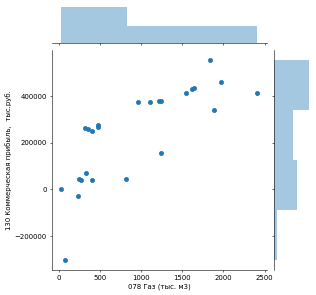

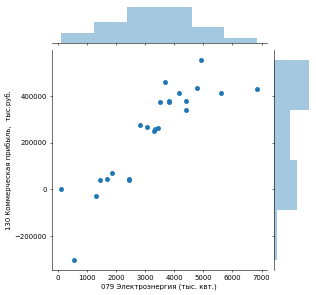

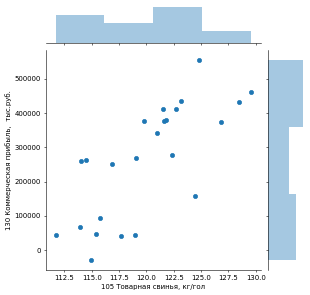

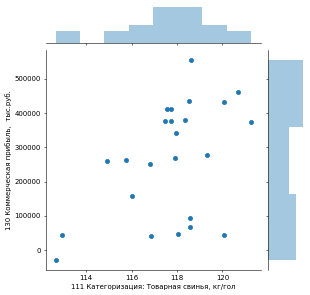

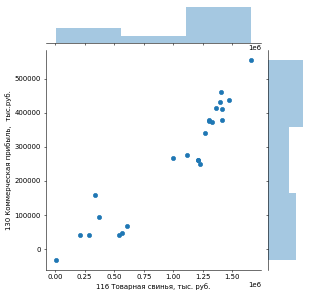

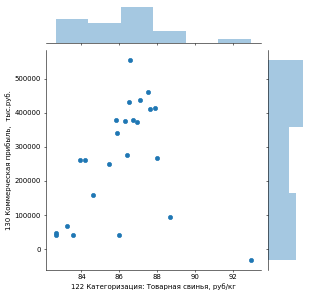

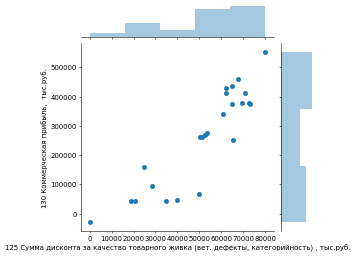

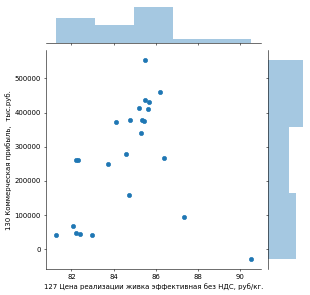

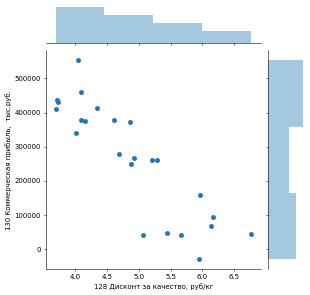

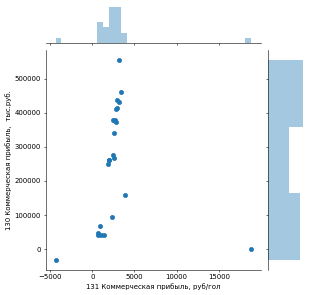

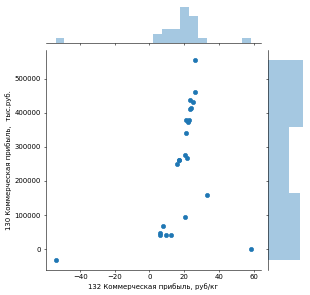

In [205]:
#увеличим дефолтный размер графиков (inches)
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 50

df_reduced.head()

for column in df_reduced.columns:
    sns.jointplot(kind='scatter',
        x=column, 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        data=df,
        )

### Найденные зависимости и выводы

In [214]:
#увеличим дефолтный размер графиков (inches)
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 75


#### Возможные корреляции для главного фин.показателя - "Коммерческая прибыль тыс.руб."

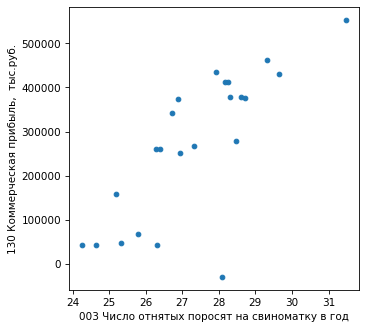

In [171]:
df.plot(kind='scatter', 
        x='003 Число отнятых поросят на свиноматку в год', 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        )

**Очень четкая корреляция** с "Числом отнятых поросят на свиноматку в год". Если больше 28 поросят в год - то площадка однозначно в числе лидеров.

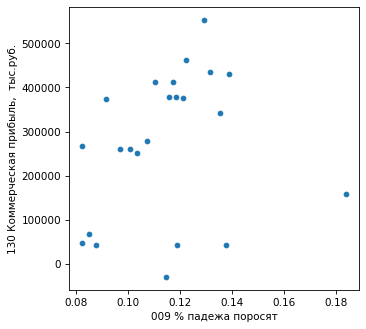

In [172]:
df.plot(kind='scatter', 
        x='009 % падежа поросят', 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        )

Интересно с падежом поросят - **отсутствие корреляции**. Даже если падеж поросят сравнительно высокий, прибыльность тоже высокая.

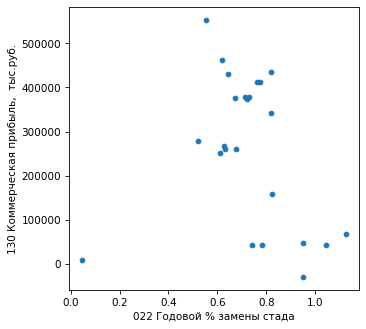

In [176]:
df.plot(kind='scatter', 
        x='022 Годовой % замены стада', 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        )

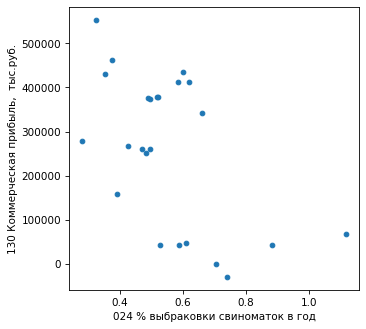

In [177]:
df.plot(kind='scatter', 
        x='024 % выбраковки свиноматок в год', 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        )

**Обратные корреляции** с "% замены стада" и "% выбраковки свиноматок". Более прибыльные площадки реже меняют стадо и мало выбраковывают.

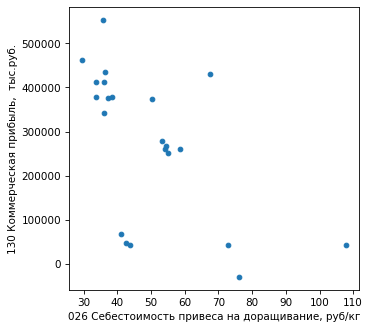

In [178]:
df.plot(kind='scatter', 
        x='026 Себестоимость привеса на доращивание, руб/кг', 
        y='130 Коммерческая прибыль,  тыс.руб.', 
        )

**Однозначная обратная корреляция** с "Себестоимостью привеса на доращивании". Топовые площадки удерживают с/с до 50 руб/кг.

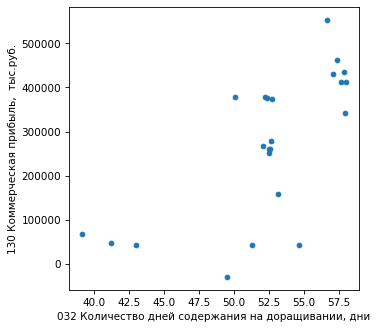

In [220]:
df.plot(kind='scatter', 
        x='032 Количество дней содержания на доращивании, дни', 
        y='130 Коммерческая прибыль,  тыс.руб.'
        )

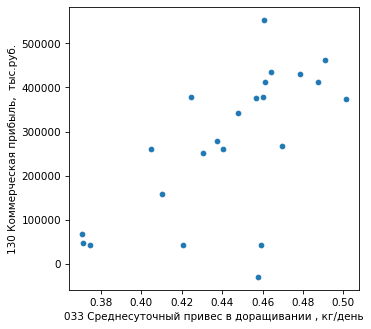

In [221]:
df.plot(kind='scatter', 
        x='033 Среднесуточный привес в доращивании , кг/день', 
        y='130 Коммерческая прибыль,  тыс.руб.'
        )

Похоже что **сильная прямая корреляция** с "количеством дней содержания на доращивании" и "среднесуточным привесом в доращивании". Прослеживается, что топовые площадки держат 57 дней и обеспечивают 0.46 кг/день и выше, а средние - 52 дня и менее 0,46. 

## Изучение временных рядов отдельных показателей, поиск аномалий

In [14]:
# исходный Excel со значениями отдельных производственных показателей по месяцам
df_timeseries = pd.read_excel(r'c:\Users\petrenkovn\Dropbox\DS-22\Data_Files\Экономика_площадки\CSV Конструктор 2020 ряд показателей в разрезе месяцев.xlsx', sheet_name='Sheet1', header=0)

df_timeseries.head()

,Показатель,Год-Месяц,Факт,Год,Месяц,Максимум за год,% от максимума
0,Число отнятых поросят на свиноматку в год,2020-янв.,"25,3",2020,1,28.6,0.884615
1,Число отнятых поросят на свиноматку в год,2020-февр.,"27,2",2020,2,28.6,0.951049
2,Число отнятых поросят на свиноматку в год,2020-мар.,"27,8",2020,3,28.6,0.972028
3,Число отнятых поросят на свиноматку в год,2020-апр.,"27,3",2020,4,28.6,0.954545
4,Число отнятых поросят на свиноматку в год,2020-мая,"28,6",2020,5,28.6,1.000000


In [15]:
# преобразование формата таблицы таким образом, чтобы каждый показатель был записан в отдельном столбце. Месяц - как индекс.
df_timeseries_pivot = df_timeseries.pivot_table(index='Месяц', columns='Показатель', values='% от максимума')

df_timeseries_pivot.head()

Показатель,"Количество дней содержания на доращивании, дни","Себестоимость привеса на доращивание, руб/кг","Среднесуточный привес в доращивании , кг/день",Число отнятых поросят на свиноматку в год
Месяц,,,,
1,0.981481,0.795112,0.993534,0.884615
2,1.000000,0.890586,0.995690,0.951049
3,0.981481,0.733244,0.997845,0.972028
4,0.981481,0.789383,1.000000,0.954545
5,0.981481,0.813061,0.984914,1.000000


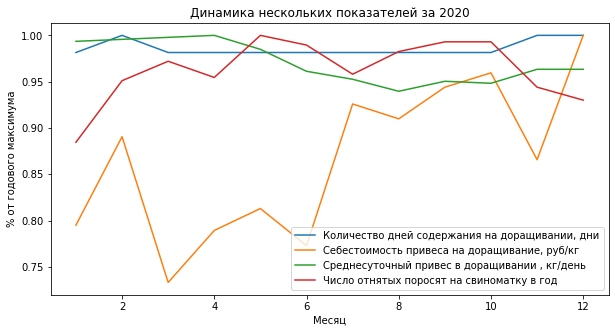

In [26]:
plt.rcParams['figure.figsize'] = [10,5]

# Линейный график с несколькими мерами, номинированными в % от годового максимума.
for measure in [x for x in df_timeseries_pivot.columns]:
    plt.plot(df_timeseries_pivot.index, df_timeseries_pivot[measure])
    plt.title('Динамика нескольких показателей за 2020')
    plt.xlabel('Месяц')
    plt.ylabel('% от годового максимума') 
    plt.legend(df_timeseries_pivot, loc='lower right')



**Необычная динамика** только по одному показателю - "Себестоимость привеса на доращивание, руб/кг". В первой половине года он сильно ниже, чем во второй половине. Возможно предмет дальнейшего анализа.